### Perceptron Linear Regression

<img src="linear_regression.png" width=500 height=500 />

**Input Values (Features)**: These are the quantitative features or attributes of the observation you're trying to classify. For example, if you're trying to determine whether an image contains a cat, the inputs might be the pixels of the image.

**Weights**: Each input feature is assigned a weight that signifies its importance. These weights are adjusted during the training process.

**Bias**: The bias, or threshold, allows the perceptron to shift the decision boundary away from the origin without depending on the input values alone. It can be thought of as an extra input to the perceptron that always has the value of 1 but has its own weight.

**Summation**: The perceptron computes a weighted sum of its input features, adding the bias to this sum.

**Activation Function**: The result of the weighted sum is passed through an activation function, which in the case of a basic perceptron is typically a step function. This function decides whether the neuron fires or not, based on the linear combination of inputs, weights, and bias. If the sum is above a certain threshold, the perceptron outputs one class (for instance, "cat"), and if it is below, it outputs the other class (e.g., "not cat").


### Error function

The training process for perceptron involves adjusting the weights and bias to minimise a cost function appropriate for regression, such as the Mean Squared Error (MSE).

<img src="mError.png" width=500 height=500 />

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [71]:
class Perceptron:

    def __init__(self, dim):
        self.w = np.zeros((dim, 1))
        self.ws = [self.w.copy()]
        self.eta = 0.01
        
    def predict(self,x):
        # Make prediction 
        pred = x @ self.w
        return pred
    
    def grad(self,T,pred,x):
        ## the gradient of the sum of squared errors with respect to w
        grd = - (T - pred) * x
        return grd
    
    def model_update(self,grd):
        # Update w: take a smallstep in the direction of the negative gradient
        self.w -= self.eta * grd

In [72]:

nSamples = 100
X = np.random.uniform(0, 10, size=(nSamples, 1))
rnd = np.random.normal(0, 0.2, size=(nSamples, 1))
T = 2 - 0.1 * X + rnd + 0.00 * (X - 3)**2 
# Change 0 to 0.05 to try to fit nonlinear data

X1 = np.insert(X, 0, 1, axis=1) ## insert bias

X1.shape, T.shape


((100, 2), (100, 1))

In [73]:
X1[0:3,:]

array([[1.        , 6.5257174 ],
       [1.        , 1.49576997],
       [1.        , 2.6269607 ]])

In [74]:
T[0:3,:]

array([[1.23870051],
       [1.52009559],
       [1.92348482]])

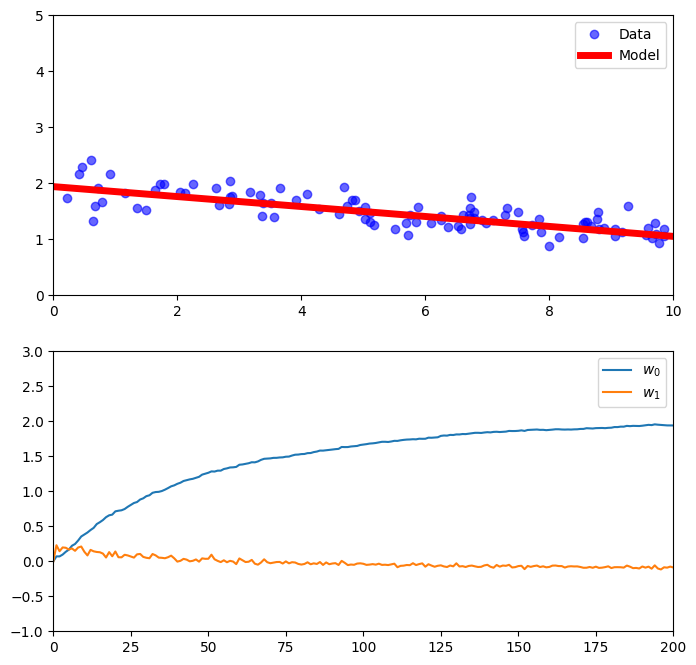

In [75]:

        
nFrames = 2000
nUpdatesPerFrame = 10
nIterations = nFrames // nUpdatesPerFrame

model = Perceptron(X1.shape[1])

fig = plt.figure(figsize=(8, 8))

for step in range(nIterations):
    
    plt.clf()
    
    for i in range(nUpdatesPerFrame):
        step += 1
        #n = step % nSamples
        n = np.random.randint(0,100, size=1)[0]
        
        predicted = model.predict(X1[n:n+1, :])
        
        grd = model.grad(T[n:n+1, :],predicted,X1[n:n+1, :].T) 
        
        model.model_update(grd)
        
        
    model.ws.append(model.w.copy())
 
    plt.subplot(2, 1, 1)
    plt.plot(X, T, 'bo', alpha=0.6)
    xs = np.linspace(0, 10, 100).reshape((-1, 1))
    xs1 = np.insert(xs, 0, 1, axis=1)
    plt.plot(xs, xs1 @ model.w, 'r-', linewidth=5)
    plt.legend(('Data','Model'), loc='upper right')
    plt.xlim(0, 10)
    plt.ylim(0, 5)

    plt.subplot(2, 1, 2)
    plt.plot(np.array(model.ws)[:, :, 0])
    plt.xlim(0, nIterations)
    plt.ylim(-1, 3)
    plt.legend(('$w_0$', '$w_1$'))

    ipd.clear_output(wait=True)
    ipd.display(fig)
    
ipd.clear_output(wait=True)